<a href="https://colab.research.google.com/github/Utpal-Mishra/Optimal-Control-Therapy-4-Cancer-Treatment/blob/main/OptimalControlTherapy4CancerTreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT**

### GOOGLE DRIVE

In [2]:
from google.colab import drive # import google drive into colaboratory
drive.mount("/content/drive")  # mount drive and the files

print("\nGOOGLE DRIVE is MOUNTED!!!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

GOOGLE DRIVE is MOUNTED!!!


### LIBRARIES

In [3]:
import pandas as pd              # import pandas to use high-performance data structure and for data analysis
import numpy as np               # import numpy to evaluate data using mathematical operations
import matplotlib.pyplot as plt  # import matplotlib for 2D graphs and plots 
import seaborn as sns            # import seaborn for visualization 
import plotly.express as px      # import plotly for interactive plots
import plotly.graph_objects as go

import sys                       # import sys to manipulate Python runtime environment
sys.setrecursionlimit(100000)    # setting recursion limit for execusion

from sklearn import preprocessing                  # import preprocessing from sklearn statistical computations
from sklearn.preprocessing import StandardScaler   # import standardscaler for scaling the feature variables
scale = StandardScaler()                           # creating scaling object

print("LIBRARIES are IMPORTED!!!")

LIBRARIES are IMPORTED!!!


### DATA 

In [4]:
path = "/content/drive/MyDrive/UCD Research/Data.xlsx"   # set the path of the .csv file from drive

data = pd.read_excel(path)                                                                 # using read_csv() of pandas library to read the data file 
print("DATA is IMPORTED!!!")

print("\nDimensions of Data: ", data.shape)                                                # printing the dimensions of the dataset

DATA is IMPORTED!!!

Dimensions of Data:  (29, 48)


In [5]:
#data.head() # or data.head(n), n=5 by default
# taking a look at the first 5 rows of the data using .head() 
data.sort_values("Patient No.")
data.head()

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47
0,0006 00007 RJW,2001-01-22,22,F,67.9,90,1.00,0.140,0.030,0.02,NaN,0.013,0.005037,0.014,0.020,0.004000,0.005,0.006,0.003,0.004,0.003,0.002,0.002,0.003,0.002,0.0010,0.001,0.001,0.001,0.001,0.0020,0.001,0.0010,0.0010,NaN,0.0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-12,NaN
1,0004 00003-CAR,2000-08-29,23,F,67.9,,NaN,NaN,2.600,1.9,0.930,0.340,NaN,0.280,NaN,NaN,NaN,0.200,0.180,0.090,0.110,0.170,0.12,0.030,0.040,0.0400,0.010,0.010,0.010,NaN,0.0100,0.010,NaN,0.0050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-07,NaN
2,0003 00002 CL,2000-08-08,27,F,67.9,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300,0.700,NaN,0.350,0.480,0.170,0.33,0.450,0.360,0.3100,NaN,NaN,NaN,0.180,NaN,0.120,NaN,NaN,NaN,0.1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-09,NaN
3,0011 00003 LM,2000-11-14,38,F,72.8,55,58.00,9.600,12.000,159,1.600,NaN,NaN,NaN,NaN,NaN,445.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-08-19,NaN
4,0001 00004 AJR,2000-08-04,51,F,75.9,28,0.08,0.026,0.042,0.022,0.018,NaN,0.003000,NaN,0.009,0.007000,0.007,0.005,0.005,0.004,0.004,0.006,0.004,0.004,NaN,0.0030,NaN,0.003,0.002,0.004,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-11,NaN
5,0011 00001 CMC,2000-10-24,52,F,75.9,213,7.60,0.510,0.090,0.07,NaN,0.030,NaN,NaN,NaN,NaN,NaN,0.010,0.010,0.005,0.007,0.003,0.003,0.009,0.004,0.0020,NaN,0.003,0.002,NaN,NaN,NaN,0.0030,NaN,0.010,0.0030,NaN,0.0020,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-12,NaN
6,0010 00001 HJ,2000-09-08,57,F,75.9,39,6.30,0.250,0.130,0.17,0.150,NaN,0.060000,0.130,NaN,0.030000,0.030,0.010,0.060,0.010,0.010,0.014,0.02,0.004,0.003,0.0009,NaN,0.004,0.001,0.004,0.0002,0.004,0.0009,0.0007,NaN,0.0010,0.001,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-10-01,NaN
7,0007 00002 DPS,2000-08-04,22,M,80.7,172,NaN,NaN,0.100,0.14,0.020,NaN,0.020000,NaN,0.020,NaN,NaN,NaN,0.020,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0020,NaN,0.008,NaN,NaN,NaN,0.290,NaN,0.005,NaN,NaN,NaN,0.0020,NaN,2010-06-08,"(patient had ceased imatinib for 6 weeks, whic..."
8,0002 00003 SMV,2000-09-04,24,M,80.7,,0.12,0.027,0.025,0.033,0.029,NaN,0.012000,0.017,0.013,0.013000,0.018,0.014,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.0040,0.003,0.003,0.002,0.002,0.0050,0.002,0.0030,0.0080,0.001,NaN,0.001,NaN,0.001,0.002,0.001,0.0020,NaN,0.002,NaN,NaN,2010-04-15,NaN
9,0011 00005 SCW,2000-11-29,26,M,80.7,36,1.40,0.500,0.280,0.16,NaN,0.190,NaN,NaN,NaN,NaN,0.130,0.020,0.170,0.150,0.060,0.070,NaN,0.120,0.050,0.0900,NaN,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0060,0.020,0.0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-03,NaN


## **EXPLORATORY DATA ANALYSIS**

### DEALING WITH EMPTY/ NULL VALUES

ANALYZING TOTOAL EMPTY VALUES IN EACH FEATURE VARIABLE

In [6]:
if data.isna().sum().sum() != 0:
  print("EMPTY VALUES EXIST IN THE DATA\n\nFollowing is a list of feature variable with their respective null values count:\n", data.isna().sum())  #or data.applymap(np.isreal).all()
# listing the total number of null values in each column of the dataset

EMPTY VALUES EXIST IN THE DATA

Following is a list of feature variable with their respective null values count:
 Patient No.                      0
start date                       0
Age                              0
sex                              0
Weight (kg)                      0
Baseline                         1
3                                2
6                                5
9                                4
12                               6
15                              17
18                              12
21                              12
24                              11
27                              11
30                              11
33                               6
36                               7
39                               5
42                               7
45                               7
48                              10
51                              12
54                              10
57                              11
60         

1. FILLING NULL VALUES OF THE NUMERICAL FEATURES WITH THEIR MEANS
2. REMOVING NULL FEATURE VARIABLES
3. REPLACE 'Unknown' WITH EMPTY VALUES IN CATEGORICAL VARIABLES

In [7]:
data = data.fillna(data.mean())                                                        # filling null celss of feature variables with the mean value of non-empty cells
#data = data.fillna("Unknown")                                                          # filling left over empty categorical features with 'Unknown' label

data[51] = data[51].fillna(0)
data[51] = data[51].replace(" ", 0)
data[51] = data[51].astype(str).astype(float)

data[105] = data[105].fillna(0)
data[105] = data[105].replace(" ", 0)
data[105] = data[105].astype(str).astype(float)

data[12] = data[12].fillna(0)
data[12] = data[12].replace(" ", 0)
data[12] = data[12].astype(str).astype(float)

data.Baseline = data.Baseline.fillna(0)
data.Baseline = data.Baseline.replace(" ", 0)
data.Baseline = data.Baseline.astype(str).astype(int)

data["Unnamed: 47"] = data["Unnamed: 47"].fillna('Unknown')

print("EMPTY VALUES: ", data.isna().sum().sum())  #or data.applymap(np.isreal).all()   # listing the total number of null values in each column of the dataset

EMPTY VALUES:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [8]:
# from google.colab import files

# data.to_csv("data.csv")
# files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODELING**

## **Splitting**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
data.tail()

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47
24,0003 00003 WM,2000-08-15,62,M,88.6,113,153.00,55.00000,82.00,0.00,0.246333,3.030176,0.084179,0.948278,7.7335,0.205984,21.274826,1.667455,2.765458,3.391273,2.227182,4.602579,0.000,0.054789,0.0435,0.045895,0.062615,0.04135,0.005077,2.504176,0.021767,0.018368,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2001-04-24,mutation detected at month 9
25,0010 00002 GR,2000-11-20,63,M,88.6,80,15.00,5.79725,0.11,0.04,0.246333,0.020000,0.020000,0.040000,0.0100,0.010000,0.010000,0.005000,0.006000,0.006000,0.008000,0.003000,0.002,0.004000,0.0030,0.045895,0.062615,0.00600,0.003000,0.006000,0.021767,0.001000,0.0020,0.002000,0.019231,0.002000,0.013083,0.00090,0.001000,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2009-02-19,Unknown
26,0002 00007 PMG,2000-11-27,64,M,88.6,25,1.90,0.48000,0.30,0.35,0.246333,0.200000,0.084179,0.160000,0.3200,0.200000,0.170000,0.070000,0.035000,0.075000,0.050000,4.602579,0.030,0.020000,0.0500,0.110000,0.030000,0.13000,0.030000,0.030000,0.040000,0.010000,0.0070,0.006000,0.007000,0.006000,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-05-16,Unknown
27,0001 00002 RH,2000-07-20,65,M,88.6,136,4.50,0.36000,0.21,0.17,0.246333,0.020000,0.008000,0.006000,0.0080,0.004708,0.007000,0.011000,0.004000,0.004000,0.005000,0.003000,0.004,0.002000,0.0020,0.002000,0.002000,0.00300,0.003000,0.001000,0.003000,0.002000,0.0010,0.001000,0.001000,0.001000,0.001000,0.00100,0.001000,0.001,0.001,0.06308,0.001407,0.14625,0.001375,0.004,2009-04-06,Unknown
28,0009 00001 DC,2000-09-25,65,M,88.6,0,0.21,0.23000,0.21,0.12,0.080000,0.080000,0.084179,0.030000,0.0500,0.050000,0.050000,0.040000,0.030000,0.020000,0.020000,0.030000,0.020,0.030000,0.0100,0.020000,0.013000,0.01300,0.005077,0.003000,0.021767,0.002000,0.0023,0.002000,0.002000,0.002000,0.002000,0.00529,0.001000,0.173,0.002,0.00200,0.001407,0.00200,0.002000,0.004,2010-08-04,Unknown


In [11]:
df = pd.DataFrame(data.groupby("Patient No.")[[3, 6, 9, 12, 15, 18, 21, 24, 27, 
                                               30, 33, 36, 39, 42, 45, 48, 51, 54, 
                                               57, 60, 63, 66, 69, 72, 75, 78, 81, 
                                               84, 87, 90, 93, 96, 99, 102,  105, 
                                               108,  111, 114, 117, 120,]].first()).reset_index()  # grouping the features based on class feature

df = df[df["Patient No."]=="0001 00002 RH"]

#print("Data Dimensions: ", df.shape)
#df.head()      

from sklearn.model_selection import train_test_split

X = df[df.columns[1:30]]
y = df[df.columns[30:41]]

x_train = X
y_train = y                                                                                                             # display last 5 data rows

## **TASK 1**

### **Model 1**

In [12]:
"""lr = LinearRegression()
  
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
y_pred = lr.predict(x_train)"""

#plt.yscale('log')
#plt.scatter(x_train, y_train, color ='b')
#plt.plot(y_train, lr.predict(x_train), color ='k')
#plt.plot(y_test, lr.predict(x_test), color ='red')

'lr = LinearRegression()\n  \nlr.fit(x_train, y_train)\nprint(lr.score(x_train, y_train))\ny_pred = lr.predict(x_train)'

In [13]:
"""#plot for the TRAIN
plt.yscale('log')
plt.scatter(x_train, y_train, color='red') # plotting the observation line
plt.plot(x_train, lr.predict(x_train), color='blue') # plotting the regression line
#plt.plot(x_train[10:30], lr.predict(x_train)[10:30], color='green') # plotting the regression line
plt.xlabel("t[days]") # adding the name of x-axis
plt.ylabel("BCR-ABL% Values") # adding the name of y-axis
plt.show() # specifies end of graph"""

'#plot for the TRAIN\nplt.yscale(\'log\')\nplt.scatter(x_train, y_train, color=\'red\') # plotting the observation line\nplt.plot(x_train, lr.predict(x_train), color=\'blue\') # plotting the regression line\n#plt.plot(x_train[10:30], lr.predict(x_train)[10:30], color=\'green\') # plotting the regression line\nplt.xlabel("t[days]") # adding the name of x-axis\nplt.ylabel("BCR-ABL% Values") # adding the name of y-axis\nplt.show() # specifies end of graph'

### **Model 2: A**

In [14]:
df = pd.DataFrame(data.groupby("Patient No.")[[3, 6, 9, 12, 15, 18, 21, 24, 27, 
                                               30, 33, 36, 39, 42, 45, 48, 51, 54, 
                                               57, 60, 63, 66, 69, 72, 75, 78, 81, 
                                               84, 87, 90, 93, 96, 99, 102,  105, 
                                               108,  111, 114, 117, 120,]].first()).reset_index()  # grouping the features based on class feature

stats = df.melt(id_vars=["Patient No."], var_name = "Imatinib Months", value_name="BCR-ABL% Values" )                          # create a dataframe with class, measuring parameters and values
#stats.sort_values(["Patient No.", "Imatinib Months"], inplace = True) 



df = stats[stats["Patient No."] == "0001 00002 RH"][["Imatinib Months", "BCR-ABL% Values"]]
df["Imatinib Months"] = df["Imatinib Months"].apply(lambda x: round(x*(365/12)))
df.head()            
#df["Imatinib Months"]   


df.to_csv("stats.csv")
files.download("stats.csv")                                                                                               # display last 5 data rows

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
Y = np.log10(Y)

#X = X.reshape(-1, 1)
#Y = Y.reshape(-1, 1)

print(X.shape)
print(Y.shape)

(40, 1)
(40,)


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LinearRegression()

for i in range(5,10,1):
  kfold = KFold(n_splits=i)
  mse = cross_val_score(model, X, Y, cv = kfold,scoring = "neg_mean_squared_error")
  #mselog = cross_val_score(model, X, Y, cv = kfold,scoring = "neg_mean_squared_log_error")
  var = cross_val_score(model, X, Y, cv = kfold,scoring = "explained_variance")
  r2 = cross_val_score(model, X, Y, cv = kfold,scoring = "r2")
  print("k: ",i, ":: MSE: %0.5f" % np.sqrt(-mse.mean()), ":: Variance: %.5f" % np.mean(var), ":: R2: %.5f:" % np.mean(r2)) #":: log(MSE): %.5f", np.mean(mselog)

k:  5 :: MSE: 1.13190 :: Variance: 0.18729 :: R2: -6.02311:
k:  6 :: MSE: 1.09831 :: Variance: 0.17552 :: R2: -5.88141:
k:  7 :: MSE: 1.07454 :: Variance: 0.00341 :: R2: -9.18268:
k:  8 :: MSE: 1.03113 :: Variance: 0.22938 :: R2: -8.02691:
k:  9 :: MSE: 0.94951 :: Variance: 0.20329 :: R2: -5.85702:


In [17]:
from sklearn.linear_model import LinearRegression
import random

lr1 = LinearRegression()
lr2 = LinearRegression()
lr1.fit(X[:8, ], Y[:8, ])
lr2.fit(X[7:35, ], Y[7:35, ])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
import plotly.graph_objects as go
fig = go.Figure()

train_err = list()
test_err  = list()

for k in range(5, 10, 1):
    print("k: ", k)
    for i in range(len(X[:k, ])):
      # calculate error
      train_err = (Y[:k, ][i] - lr1.predict(X[:k, ][[i]]))**2
      #print("Error For Observation " + str(i+1) + ": %.5f" % Err[0])
    print("Training Error: %.5f" % train_err.sum())

    for i in range(len(X[k-2:35, ])):
      # calculate error
      Err = (Y[k-2:35, ][i] - lr1.predict(X[k-2:35, ][[i]]))**2
    print("Testing Error: %.5f" % Err.sum(), "\n")


k:  5
Training Error: 0.31322
Testing Error: 87.22667 

k:  6
Training Error: 0.02417
Testing Error: 87.22667 

k:  7
Training Error: 0.03316
Testing Error: 87.22667 

k:  8
Training Error: 0.00413
Testing Error: 87.22667 

k:  9
Training Error: 0.31413
Testing Error: 87.22667 



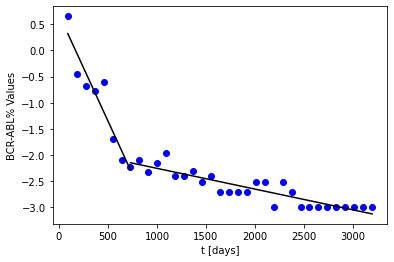

In [19]:
#plt.yscale("log")
plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(X[:8, ]), color='black')
plt.plot(X[7:35, ], lr2.predict(X[7:35, ]), color='black') 
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t [days]")
plt.show()

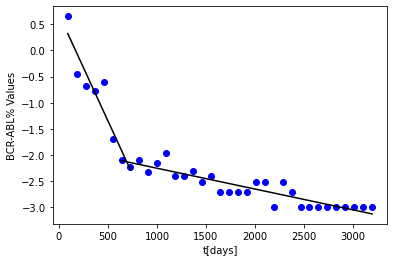

In [20]:
lr1.fit(X[:8, ], Y[:8, ])
lr2.fit(X[6:35, ], Y[6:35, ])

plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(X[:8, ]), color='black')
plt.plot(X[6:35, ], lr2.predict(X[6:35, ]), color='black')
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t[days]")
plt.show()

### **Polynomial**

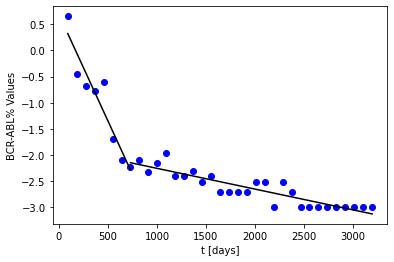

In [21]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 1)
X_poly = pr.fit_transform(X)

lr1 = LinearRegression()
lr2 = LinearRegression()
lr1.fit(X_poly[:8, ], Y[:8, ])
lr2.fit(X_poly[7:35, ], Y[7:35, ])

#plt.yscale("log")
plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(pr.fit_transform(X[:8, ])), color='black')
plt.plot(X[7:35, ], lr2.predict(pr.fit_transform(X[7:35, ])), color='black')
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t [days]")
plt.show()